# **给 Colab 用户的注意事项**

# **不要直接在这个文件里写——你的内容可能会丢失！**

# **开始前一定要先复制一份。**

如何复制文件

1. 点击左上角的“File”。
> *如果看不到菜单栏（比如“File”或“Runtime”），点击右上角的“v”图标展开。*

2. 选择“Save a copy in Drive”

3. 把复制的文件改名为“YOURNAMEs_FileName.ipynb”。
> 例：如果你叫 Olivia，就改成 Olivias_FileName.ipynb



---

* 勾选标记（✅）不会被保存。<br>
用 Chrome 的刷新按钮重新加载页面时，它们会消失。<br>
如果暂时要停，推荐加一个文本单元格，写上“SO FAR DONE”之类的提示。

---

* 在 Colab 中，**之前的输出会每30到90分钟重置一次**。<br>
所以经常会遇到 `~~ is not defined` 这类错误。

  🔁 出现 `~~ is not defined` 错误该怎么办  
  1. 先确认变量拼写没错。<br>
  2. 如果拼写正确，但还是出错，**点一下你想重启的单元格**。<br>
  3. 点击左上角“Runtime” → 选择“Run before”。<br>
    → 这样会**重新运行所有之前的单元格**。  
  4. 然后再运行当前单元格。

  如果按以上步骤操作后还是出错，<br>
说明你之前单元格的 TODO 答案里可能有基本错误。<br>
请检查答案是否正确，或者试着向 ChatGPT 或其他编程助手求助。

# **Chapter 2: TokenEmbedding**

### **Section 0: Preparation**

本节仅加载前面章节的内容。<br>
直接运行代码即可，没必要细看。<br>
你也可以直接跳过。<br>

In [ ]:
# 下载文件
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# 加载刚下载的名为 input.text 的文件，编码为 utf-8。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

In [ ]:
# 一个用于美观显示张量的函数（可跳过）

import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

### **Section 1: Word2Vec**

让我们回顾一下。

[Watch the video!](https://youtu.be/wvsE8jm1GzE)¹

- 3分钟，英文音频  
- video_id = "wvsE8jm1GzE"

---

内容参考：  
¹ **Google Developers**， “Word2Vec Explained (Distributed Representations – Visualizing High-Dimensional Space),” YouTube, 6:24, 2016年6月23日。访问日期：2025年7月8日。

---

In [ ]:
# Colab 用户只需运行此代码即可观看视频。
from IPython.display import HTML
video_id = "wvsE8jm1GzE"
HTML(f"""<div style="text-align: center;"><iframe width="720" height="405"
        src="https://www.youtube.com/embed/{video_id}?autoplay=0&modestbranding=1&showinfo=0&rel=0&controls=1"
        frameborder="0" allowfullscreen></iframe></div>""")

通常，token 被当作单词处理，但**nanoGPT 使用字符作为 token**。

所以，与上面视频中展示的基于单词的 Token Embeddings 不同，记住 nanoGPT 的表达能力较弱。

### **Section 2: __init__**

指定词汇表大小以初始化 `nn.Embedding` 类

```python
Instance: embedding_table = nn.Embedding(vocab_size, embedding_dim)
vocab_size: 65
embedding_dim: 8
```
- 创建一个用于词元的向量嵌入字典。
- `vocab_size = 65` 表示莎士比亚文本中不同字符的总数。
- `embedding_dim = 8` 是每个嵌入向量的维度。


In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(1337)

vocab_size = 65  # 莎士比亚文本类型
embedding_dim = 8 # 这次的嵌入维度
embedding_table = # TODO: 定义 nn.Embedding（词汇表大小，嵌入维度）

# 检查嵌入表的初始化状态
print_formatted_tensor("嵌入表权重：\n", embedding_table.weight)

**`Check Point`**  
<label><input type="checkbox">张量大小: [65, 8]</label>

**Section 2: init** <label><input type="checkbox"> 标记为完成</label>

### **Section 3: embed**

获取 Embeddings

```python
Instance: embedding_table
Method: forward (或可省略)
Argument: input_indices
```
- 例如，获取8个字符字符串 `Let's he` 的嵌入向量。


In [ ]:
# 输入序列和索引
input_sequence = "Let's he"
input_indices = torch.tensor([[24, 43, 58,  5, 57,  1, 46, 43]])

# 获取嵌入向量
token_embed_input = # TODO: 将输入索引用于嵌入表
print_formatted_tensor("token_embed_input", token_embed_input)

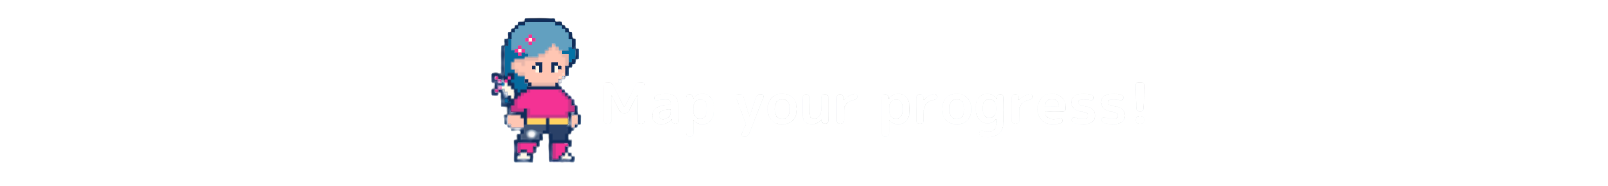

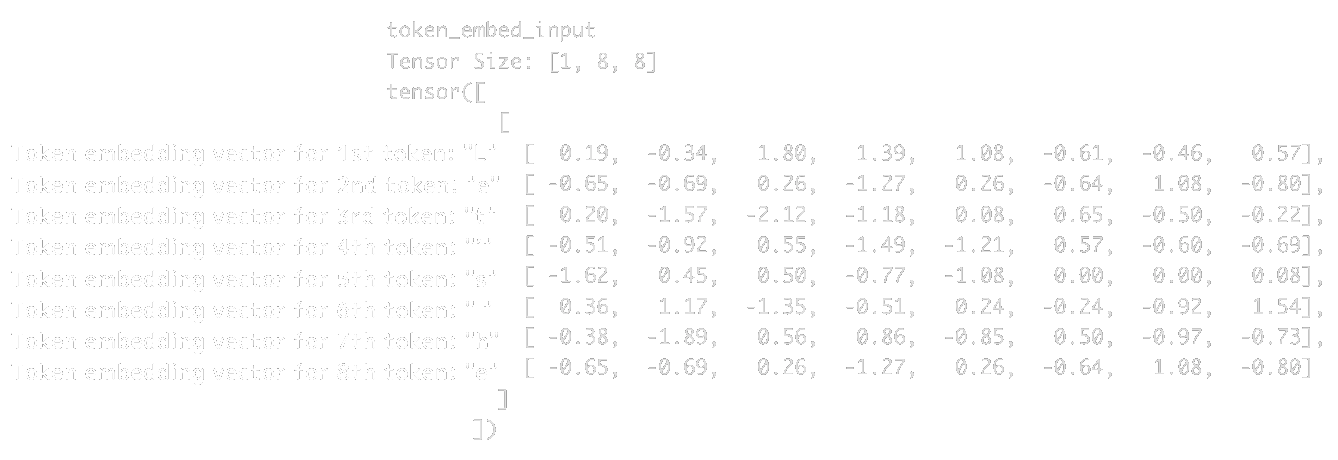

**Section 3: embed** <label><input type="checkbox"> Mark as done</label>

### **Section 4: 定义一个类**

让我们把到目前为止的内容整合起来。<br>
你将创建一个使用嵌入字典的类。<br>
它会把一串ID（也就是一串词元）转换成向量。

🔘 **Options**：可能会有你用不到的额外选项。

`nn.Embedding`  `vocab_size`  `self.token_embedding_table`  `input_indices` 　　`nn.Linear`  `embedding_dim`


In [ ]:
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # 定义一个嵌入表，词汇量为 x，嵌入维度数为
        self.token_embedding_table = _____(_____, _____)

    def embed(self, input_indices):
        # 获取对应输入索引的嵌入向量
        return ___________.forward(____)

<details>
<summary>点击这里显示/隐藏答案</summary>

```python
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # 定义一个词汇表大小 × 嵌入维度的嵌入表
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # 获取输入索引对应的嵌入向量
        return self.token_embedding_table.forward(input_indices)
```

In [ ]:
# 配置类，存储模型设置
class ModelConfig:
    batch_size = 1  # 每次处理的数据量（批量大小）
    input_sequence_length = 8  # 输入数据长度（序列长度）
    embedding_dim = 8  # 嵌入层大小（特征向量的维度数）

```python
Class: TokenEmbedding
Arguments: vocab_size=65, embedding_dim= THINK_FOR_YOURSELF # 使用配置。
```

In [ ]:
torch.manual_seed(1337)

# 创建 ModelConfig 实例。无配置参数（构造函数）。
config = ModelConfig()
token_embedding_layer = # TODO: 实例 = 类（参数）
print_formatted_tensor("嵌入表", embedding_table.weight)

```python
Instance: token_embedding_layer
Method: THINK_FOR_YOURSELF
Argument: sample_input_tokens

token_embeddings = Instance.Method(Argument)
```

In [ ]:
# 兼容 Let’s he。（批量大小，标记长度）=（1，8）
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

token_embeddings = # TODO: 获取对应输入索引的嵌入向量。
print_formatted_tensor("令牌嵌入", token_embeddings)

**`Check Point`**  
<label><input type="checkbox">上述 `token_embeddings` 张量与 `token_embed_input` 张量一致</label>

**Section 3: Define a Class** <label><input type="checkbox"> 标记为已完成</label>

**Chapter 2: The TokenEmbedding Class** <label><input type="checkbox"> Mark as Done</label>